In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#### AutoGluon drag

In [33]:
df_test = pd.read_csv("./data/plane_autogluon_lift_test.csv")
# df_test.head()
df_train = pd.read_csv("./data/plane_autogluon_lift_train.csv")
# df_train.head()

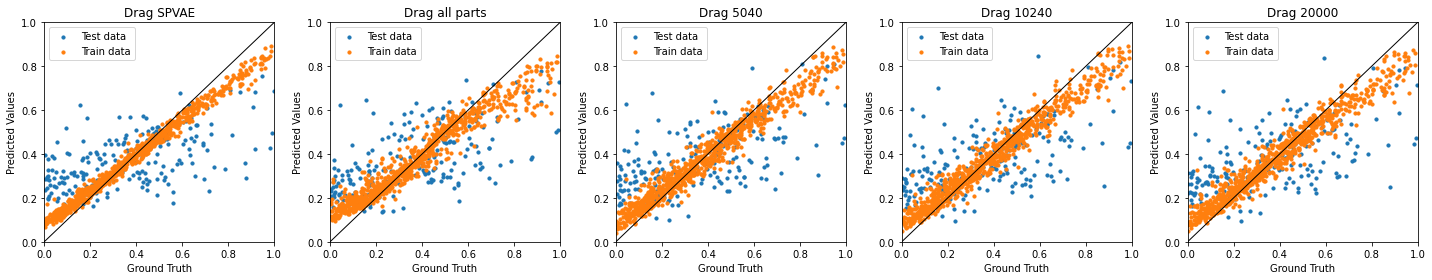

In [34]:
models = ['SPVAE', 'all parts', '5040', '10240', '20000']
gt_test = df_test['GT']
gt_train = df_train['GT']
# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Iterate over the subplots and plot the data
for i, ax in enumerate(axes):
    method_data_test = df_test[models[i]]
    method_data_train = df_train[models[i]]
    max_value = 1
    min_value = 0
    ax.plot([min_value, max_value], [min_value, max_value], color='black', linewidth=1)
    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.scatter(gt_test, method_data_test, s=10, label='Test data')
    ax.scatter(gt_train, method_data_train, s=10, label='Train data')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel(f'Predicted Values')
    ax.set_title(f'Drag {models[i]}')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

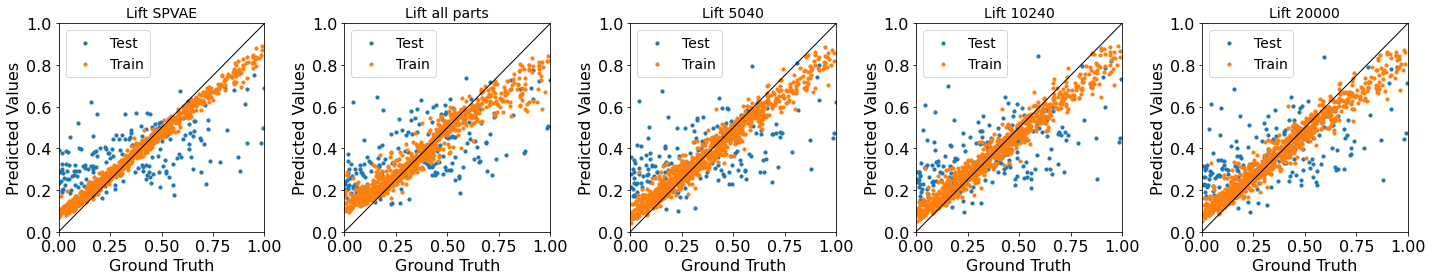

In [42]:
models = ['SPVAE', 'all parts', '5040', '10240', '20000']
gt_test = df_test['GT']
gt_train = df_train['GT']
# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Iterate over the subplots and plot the data
for i, ax in enumerate(axes):
    method_data_test = df_test[models[i]]
    method_data_train = df_train[models[i]]
    max_value = 1
    min_value = 0
    ax.plot([min_value, max_value], [min_value, max_value], color='black', linewidth=1)
    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.scatter(gt_test, method_data_test, s=10, label='Test')
    ax.scatter(gt_train, method_data_train, s=10, label='Train')
    ax.set_xlabel('Ground Truth', fontsize=16)
    ax.set_ylabel(f'Predicted Values', fontsize=16)
    ax.set_title(f'Lift {models[i]}', fontsize=14)
    ax.tick_params('y', labelsize=16)
    ax.tick_params('x', labelsize=16)
    ax.legend(fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
#absolute error
df_ae_SPVAE_test = abs(df_test['SPVAE'] - df_test['GT'])
df_ae_all_parts_test = abs(df_test['all parts'] - df_test['GT'])
df_ae_5040_test = abs(df_test['5040'] - df_test['GT'])
df_ae_10240_test = abs(df_test['10240'] - df_test['GT'])
df_ae_20000_test = abs(df_test['20000'] - df_test['GT'])


In [37]:
# Perform t-test
t_statistic, two_sided_p_value = stats.ttest_rel(df_ae_SPVAE_test, df_ae_all_parts_test)
one_sided_p_value = two_sided_p_value / 2

# Print results
print("P-value:", one_sided_p_value)

P-value: 0.08363226592112061


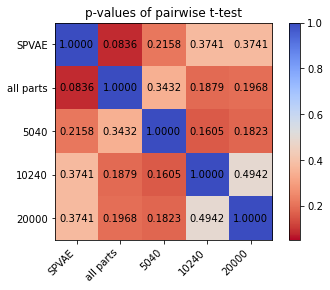

In [38]:
# absolute error
df_ae_SPVAE_test = abs(df_test['SPVAE'] - df_test['GT'])
df_ae_all_parts_test = abs(df_test['all parts'] - df_test['GT'])
df_ae_5040_test = abs(df_test['5040'] - df_test['GT'])
df_ae_10240_test = abs(df_test['10240'] - df_test['GT'])
df_ae_20000_test = abs(df_test['20000'] - df_test['GT'])

df_se_SPVAE_test = df_ae_SPVAE_test ** 2
df_se_all_parts_test = df_ae_all_parts_test ** 2
df_se_5040_test = df_ae_5040_test ** 2
df_se_10240_test = df_ae_10240_test ** 2
df_se_20000_test = df_ae_20000_test ** 2

data_frames = [df_ae_SPVAE_test, df_ae_all_parts_test, df_ae_5040_test, df_ae_10240_test, df_ae_20000_test]
method_names = ['SPVAE', 'all parts', '5040', '10240', '20000']

# Create a symmetric matrix to store p-values
p_values = np.zeros((len(data_frames), len(data_frames)))

# Perform paired t-tests for all possible pairs and store p-values
for i in range(len(data_frames)):
    for j in range(i + 1, len(data_frames)):
        data1 = data_frames[i]
        data2 = data_frames[j]

        _, two_sided_p_value = stats.ttest_rel(data1, data2)
        p_values[i, j] = two_sided_p_value / 2 #one-sided p value
        p_values[j, i] = two_sided_p_value / 2 #one-sided p value

# Set diagonal values to NaN to exclude them from display
np.fill_diagonal(p_values, int(1))

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.imshow(p_values, cmap='coolwarm_r', vmin=0.05) #reversed color map

# Show all ticks and labels
ax.set_xticks(np.arange(len(method_names)))
ax.set_yticks(np.arange(len(method_names)))
ax.set_xticklabels(method_names)
ax.set_yticklabels(method_names)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title
ax.set_title('p-values of pairwise t-test')

# Display values inside the heatmap
for i in range(len(method_names)):
    for j in range(len(method_names)):
        text = ax.text(j, i, f'{p_values[i, j]:.4f}',
                       ha="center", va="center", color="black")

plt.show()



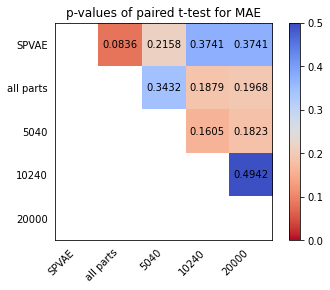

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a symmetric matrix to store p-values
p_values = np.zeros((len(data_frames), len(data_frames)))

# Perform paired t-tests for all possible pairs and store p-values
for i in range(len(data_frames)):
    for j in range(i + 1, len(data_frames)):
        data1 = data_frames[i]
        data2 = data_frames[j]

        _, two_sided_p_value = stats.ttest_rel(data1, data2)
        p_values[i, j] = two_sided_p_value / 2 # one-sided p value
        p_values[j, i] = np.nan # one-sided p value

# Set diagonal values to NaN to exclude them from display
np.fill_diagonal(p_values, np.nan)

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.imshow(p_values, cmap='coolwarm_r', vmin=0, vmax=0.5) # reversed color map

# Show only upper triangle of the heatmap
ax.set_xticks(np.arange(len(method_names)))
ax.set_yticks(np.arange(len(method_names)))
ax.set_xticklabels(method_names)
ax.set_yticklabels(method_names)
ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title
ax.set_title('p-values of paired t-test for MAE')

# Display values inside the heatmap
for i in range(len(method_names)):
    for j in range(len(method_names)):
        if j > i:
            text = ax.text(j, i, f'{p_values[i, j]:.4f}',
                           ha="center", va="center", color="black")

plt.show()


In [40]:
import numpy as np

models = ['SPVAE', 'all_parts', '5040', '10240', '20000']
mae_list_test = []
std_ae_list_test = []
rmse_list_test = []
r2_test_list = []

mean_gt_test = gt_test.mean()
SST_test = np.sum((gt_test - mean_gt_test) ** 2)

for method in models:
    # Mean Absolute Error
    mae = globals()['df_ae_{}_test'.format(method)].mean()
    std = globals()['df_ae_{}_test'.format(method)].std()
    mae_list_test.append(mae)
    std_ae_list_test.append(std)
    
    # Squared Error
    df_se = globals()['df_se_{}_test'.format(method)]
    SSE = df_se.sum()
    rmse = np.sqrt(df_se.mean())
    r2 = 1 - SSE / SST_test
    rmse_list_test.append(rmse)
    r2_test_list.append(r2)

print("Methods:")
print(models)
print("Mean Absolute Error:")
print(mae_list_test)
print("Std Absolute Error:")
print(std_ae_list_test)
print("Root Mean Squared Error:")
print(rmse_list_test)
print("R2:")
print(r2_test_list)


Methods:
['SPVAE', 'all_parts', '5040', '10240', '20000']
Mean Absolute Error:
[0.16067784743809527, 0.15477084963333335, 0.15665775404761909, 0.15900082445238087, 0.15897293163809526]
Std Absolute Error:
[0.12219707584693777, 0.1144757098664323, 0.12197396224291979, 0.12123844139494723, 0.12220913078431417]
Root Mean Squared Error:
[0.2016888461072991, 0.19234422468258688, 0.1983644459780303, 0.1997749427599401, 0.20034057315449746]
R2:
[0.3141399252679613, 0.3762219889162477, 0.3365633993498751, 0.3270949468499632, 0.3232791091769236]


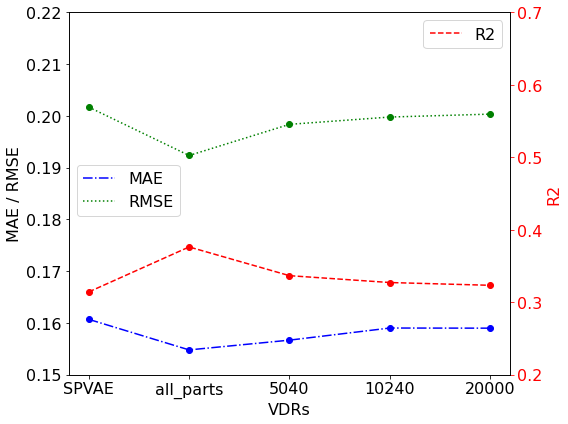

In [41]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))


# Plot MAE and RMSE on left y-axis with dashed lines
ax1.plot(models, mae_list_test, 'b-.', label='MAE')
ax1.scatter(models, mae_list_test, color='b')
ax1.plot(models, rmse_list_test, 'g:', label='RMSE')
ax1.scatter(models, rmse_list_test, color='g')
ax1.set_ylabel('MAE / RMSE', color='black', fontsize=16)
ax1.tick_params('y', colors='black', labelsize=16)
ax1.set_ylim(0.15, 0.22)

# Create a second y-axis on the right for R2
ax2 = ax1.twinx()
ax2.plot(models, r2_test_list, 'r--', label='R2')
ax2.scatter(models, r2_test_list, color='r')
ax2.set_ylabel('R2', color='red', fontsize=16)
ax2.tick_params('y', colors='red', labelsize=16)
ax2.set_ylim(0.2, 0.7)  # Set y-axis limit from 0.2 to 0.7

# Position legends outside the plot area
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.6), fontsize=16)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=16)

# Set x-axis label and title with increased font size
plt.xlabel('Models', fontsize=14)
# plt.title('Evaluation Metrics', fontsize=16)
# Set x-axis label and title with increased font size
ax1.set_xlabel('VDRs', fontsize=16)  # Increase font size here
ax1.tick_params('x', colors='black', labelsize=16)
ax2.set_xlabel('VDRs', fontsize=16)
ax2.tick_params('x', colors='black', labelsize=16)

# Adjust spacing to prevent legend overlap
plt.tight_layout()

# Display the plot
plt.show()

